This notebook provides a guide to visualize the results. You can directly run it since we have prepared all log files.

If you want to replace the logs with your own running results, please follow the instruction from [this link](https://github.com/chongminggao/CIRS-codes/tree/main/reproduce_results_of_our_paper#a-guide-to-produce-the-main-results-of-the-paper).

#### Visualize Figure 5 in the paper

In [2]:
from visual_main_figure import visual4
from visual_utils import *
import os
import warnings
warnings.simplefilter('ignore')

Loading logs...
Producing the figure...


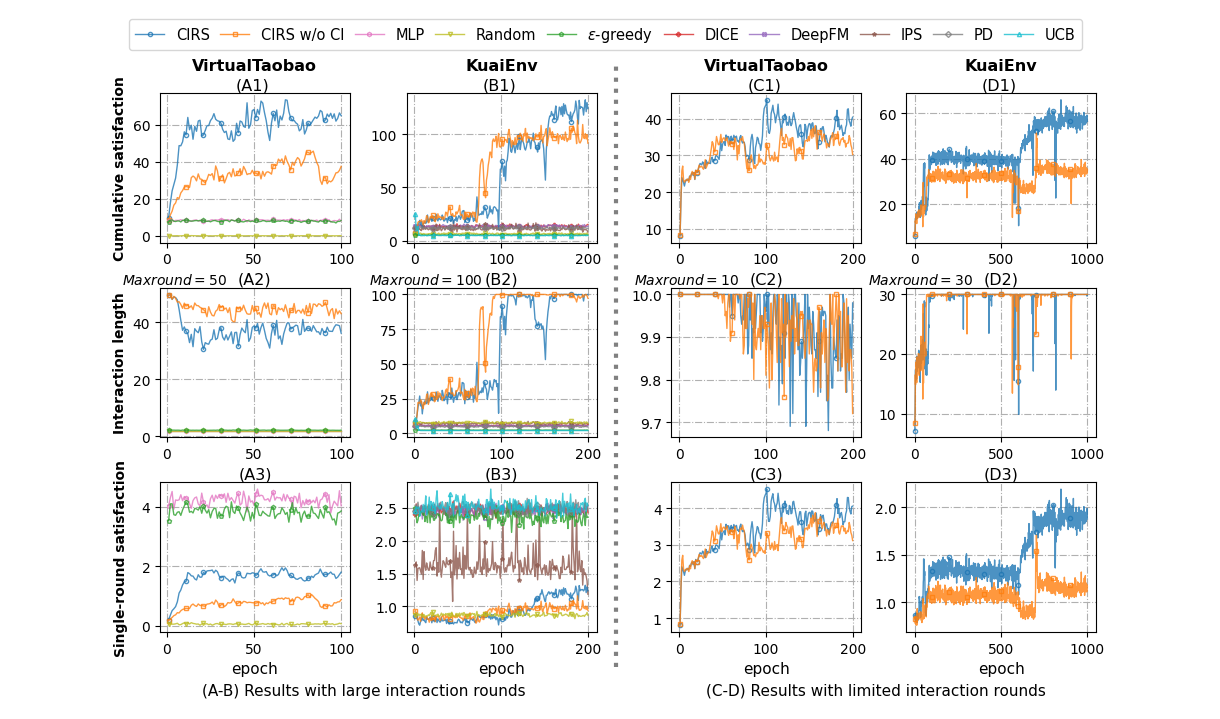

In [2]:
realpath = os.getcwd()
save_fig_dir = os.path.join(realpath, "figures")

create_dirs = [save_fig_dir]
create_dir(create_dirs)

dirpath = "./results_all_methods"

print("Loading logs...")
ways = {'FB'}
metrics = {'ctr', 'len_tra', 'R_tra'}
result_dir1 = os.path.join(dirpath, "taobao_len50")
filenames = walk_paths(result_dir1)
dfs1 = loaddata(result_dir1, filenames)
df1 = organize_df(dfs1, ways, metrics)

ways = {'FB'}
metrics = {'ctr', 'len_tra', 'R_tra'}
result_dir3 = os.path.join(dirpath, "taobao_len10")
filenames = walk_paths(result_dir3)
dfs3 = loaddata(result_dir3, filenames)
df3 = organize_df(dfs3, ways, metrics)

ways = {'FB'}
metrics = {'ctr', 'len_tra', 'R_tra'}
result_dir2 = os.path.join(dirpath, "kuaishou_len100")
filenames = walk_paths(result_dir2)
dfs2 = loaddata(result_dir2, filenames)
df2 = organize_df(dfs2, ways, metrics)

ways = {'FB'}
metrics = {'ctr', 'len_tra', 'R_tra'}
result_dir4 = os.path.join(dirpath, "kuaishou_len30")
filenames = walk_paths(result_dir4)
dfs4 = loaddata(result_dir4, filenames)
df4 = organize_df(dfs4, ways, metrics)

print("Producing the figure...")
way = "FB"
df1, df2, df3, df4 = df1[way], df2[way], df3[way], df4[way]
visual4(df1, df2, df3, df4, save_fig_dir, savename="main_result")

#### Visualize Table 2 in the paper

In [3]:
from visual_main_table import handle_table 
from IPython.display import display, HTML

realpath = os.getcwd()
save_fig_dir = os.path.join(realpath, "figures")

create_dirs = [save_fig_dir]
create_dir(create_dirs)

print("Loading logs...")
dirpath = "./results_all_methods/kuaishou_len100"
filenames = walk_paths(dirpath)
dfs = loaddata(dirpath, filenames)

ways = {'FB', 'NX_0_'}
metrics = {'len_tra', 'CV', 'CV_turn', 'ifeat_feat'}
df_all = organize_df(dfs, ways, metrics)

print("Producing the table...")
savename = "all_results"
df_latex, df_excel = handle_table(df_all, save_fig_dir, savename=savename)

# display(df_excel)
display(HTML(df_excel.to_html()))

# please install openpyxl if you want to write to an excel file.
# excel_path = os.path.join(save_fig_dir, savename + '.xlsx')
# df_excel.to_excel(excel_path)

Loading logs...
Producing the table...


#### Visualize Figure 7 in the paper

Loading logs...
Loading user/item counts of training data...
Producing the figure...


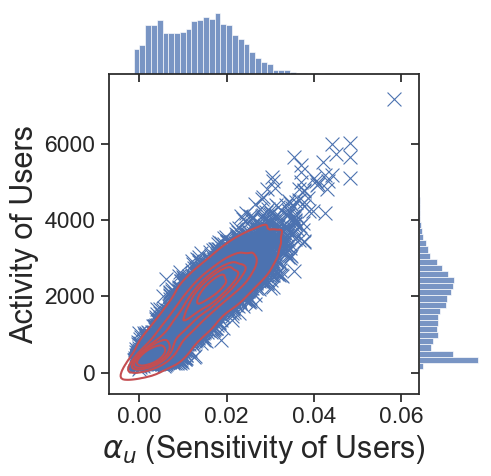

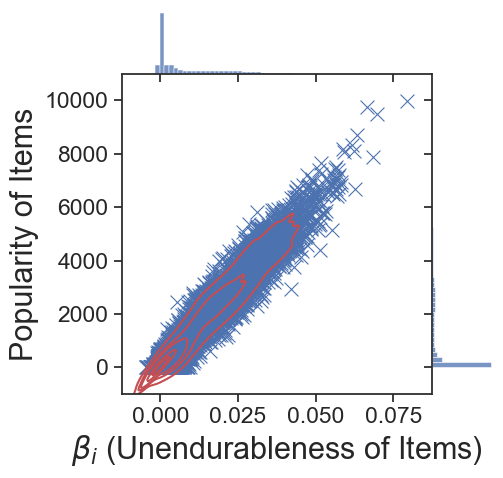

In [4]:
from visual_ab import visual_ab
import torch

def loaddata_ab(model_save_path):
    model_params = torch.load(model_save_path)
    alpha_u = model_params["ab_embedding_dict.alpha_u.weight"].detach().cpu().numpy()
    beta_i = model_params["ab_embedding_dict.beta_i.weight"].detach().cpu().numpy()
    return alpha_u, beta_i

visual_path = "results_alpha_beta"
user_model_name = "DeepFM"
read_message = "Pair11"
DATAPATH = "../environments/KuaishouRec/data"

print("Loading logs...")
realpath = os.getcwd()
save_fig_dir = os.path.join(realpath, "figures")

model_save_path = os.path.join(visual_path, "{}_{}.pt".format(user_model_name, read_message))

alpha_u, beta_i = loaddata_ab(model_save_path)

print("Loading user/item counts of training data...")
with open('user_cnt_train.json', 'r') as openfile:
    user_cnt = json.load(openfile)
with open('item_cnt_train.json', 'r') as openfile:
    item_cnt = json.load(openfile)
user_cnt = {int(k):int(v) for k,v in user_cnt.items()}
item_cnt = {int(k):int(v) for k,v in item_cnt.items()}
## The original way to get user_cnt and item_cnt.
# bigmatrix_filename = os.path.join(DATAPATH, "big_matrix.csv")
# df_big = pd.read_csv(bigmatrix_filename, usecols=['user_id', 'photo_id'])
# user_cnt = dict(collections.Counter(df_big['user_id']))
# item_cnt = dict(collections.Counter(df_big['photo_id']))

print("Producing the figure...")
visual_ab(alpha_u, beta_i, user_cnt, item_cnt, save_fig_dir)

#### Visualize Figure 6 in the paper
Note the logs for this visualization are generated by `./scripts/script_envs.sh`.

Loading logs...
Transform data...
Producing the figure...


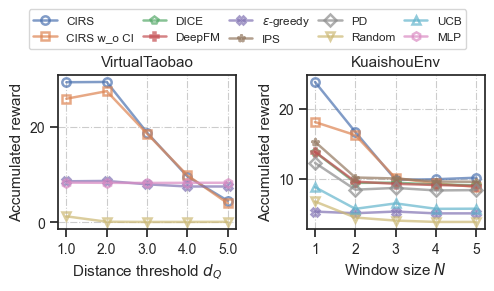

In [5]:
from visual_leave_threshold import visual_leave_threshold, group_data

realpath = os.getcwd()
save_fig_dir = os.path.join(realpath, "figures")

print("Loading logs...")
dir1 = os.path.join(".", "results_leave", "kuaishou")
filenames1 = walk_paths(dir1)
df1 = loaddata(dir1, filenames1)

dir2 = os.path.join(".", "results_leave", "taobao")
filenames2 = walk_paths(dir2)
df2 = loaddata(dir2, filenames2)


print("Transform data...")
ways={'FB'}
metrics={'ctr', 'len_tra', 'R_tra',  'CV', 'CV_turn', 'ifeat_feat'}
df_kuaishou = organize_df(df1, ways, metrics)

ways = {'FB'}
metrics = {'ctr', 'len_tra', 'R_tra'}
df_taobao = organize_df(df2, ways, metrics)

df_ks = df_kuaishou['FB']
df_tb = df_taobao['FB']

df_ks_grouped = group_data(df_ks)
df_tb_grouped = group_data(df_tb)

print("Producing the figure...")
visual_leave_threshold(df_ks_grouped, df_tb_grouped, save_fig_dir, savename="leave")

#### All figures and tables are saved under `./figures`.